# 데이터 분석

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# pd.set_option("precision", 3)

## 1. 데이터 준비

In [78]:
df = pd.read_csv("../data/ch2_scores_em.csv",
				 index_col="student number")

In [79]:
en_scores = np.array(df["english"])[:10]
ma_scores = np.array(df["mathematics"])[:10]

scores_df = pd.DataFrame({"english": en_scores,
						  "mathematics": ma_scores},
						  index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name="student"))

In [80]:
display(scores_df)

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 2. 상관관계

**양의 상관**(같은 방향)  
영어 점수가 **높은** 학생일 수록 수학점수가 **높은** 경향이 있을 때  

**음의 상관**(서로 반대)  
영어 점수가 **높은** 학생일 수록 수학점수가 **낮은** 경향이 있을 때  

**무상관**  
영어 점수가 수학 점수에 직접적 영향을 미치지 않을 때

아래의 그래프를 보면 양의 상관 관계임을 확인할 수 있음

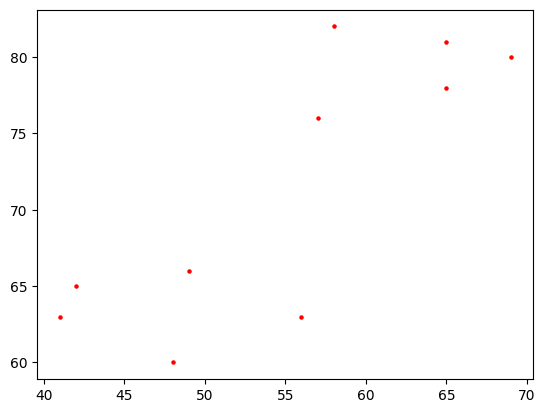

In [81]:
plt.scatter(scores_df["english"], scores_df["mathematics"], c="red", s=5)
plt.show()

## 3. 공분산

x데이터들의 편차 * y데이터들의 편차 / 데이터 개수

In [82]:
summary_df = scores_df.copy()
summary_df["english_deviation"] = summary_df["english"] - summary_df["english"].mean()
summary_df["mathematics_deviation"] = summary_df["mathematics"] - summary_df["mathematics"].mean()
summary_df["product of deviations"] = summary_df["english_deviation"] * summary_df["mathematics_deviation"]

display(summary_df)
print(summary_df["product of deviations"].mean())	# 이게 공분산

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


62.8


In [83]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
print(cov_mat)

'''
	  영어  	수학
영어   86		62.8
수학   62.8 	68.44

영어 & 영어 : 영어의 분산
수학 & 수학 : 수학의 분산
영어 & 수학 : 공분산

'''

print(cov_mat[0,1], cov_mat[1,0])	# 이게 공분산

[[86.   62.8 ]
 [62.8  68.44]]
62.800000000000004 62.800000000000004


## 4. 상관 계수

-1 ~ 1의 범위를 가짐.  
-1에 가까울 수록 음의 분산  
1에 가까울 수록 양의 분산  
0에 가까울 수록 무상관

In [84]:
print(cov_mat[0,1] / (np.std(en_scores) * np.std(ma_scores)))

print(np.corrcoef(en_scores, ma_scores))
display(scores_df.corr())

0.8185692341186713
[[1.         0.81856923]
 [0.81856923 1.        ]]


,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000
